# $$\text{AE102 PROJECT - TEAM BAYTEX}$$
### Topic: Oil & Stocks in Covid

Contributors: 
<br> Vighnesh JR (210010073)
<br> Shantanu Welling (210010076)
<br> Sahil Kale (210010054)

#### Our project studies stock prices of 3 major oil corporations namely Chevron, ExxonMobil and PetroChina, their interdependence and fluctuations during the initial Covid period (from January 2020 to May 2020). It also includes WTI Crude Oil barrel prices in this period and its relationship with the other stock prices. Our project aims to analyse a pattern and dependence between these quantities based on their trends.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('AE102data.csv',sep=',')
Data.head()

,Index,Date,xom,rr,pc,chev,barrel
0,1,02-01-2020,61.174892,418.58,44.31,108.0606,61.17
1,2,03-01-2020,60.683086,417.39,44.76,107.6868,63.00
2,3,06-01-2020,61.149010,414.09,46.27,107.3220,63.27
3,4,07-01-2020,60.648567,421.60,45.83,105.9515,62.70
4,5,08-01-2020,59.733967,433.79,44.89,104.7412,59.65


In [3]:
Data = Data.drop(['Index'],axis=1)
Data = Data.drop(['rr'],axis=1)

In [4]:
Data.head()

,Date,xom,pc,chev,barrel
0,02-01-2020,61.174892,44.31,108.0606,61.17
1,03-01-2020,60.683086,44.76,107.6868,63.00
2,06-01-2020,61.149010,46.27,107.3220,63.27
3,07-01-2020,60.648567,45.83,105.9515,62.70
4,08-01-2020,59.733967,44.89,104.7412,59.65


In [5]:
xom = Data['xom'].to_numpy() #ExxonMobil Stock Prices numpy array
pc = Data['pc'].to_numpy() #PetroChina Stock Prices numpy array
chev = Data['chev'].to_numpy() #Chevron Stock Prices numpy array
barrel = Data['barrel'].to_numpy() #Oil Barrel Prices numpy array
days=np.array([i for i in range(1,104)])

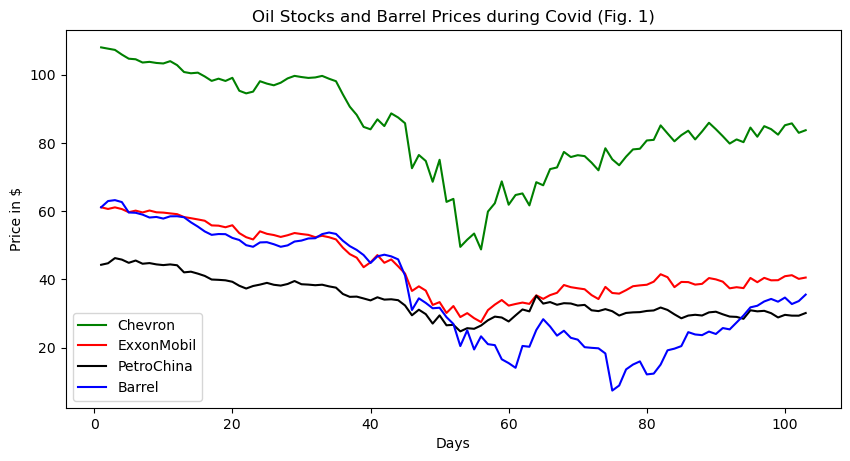

In [6]:
#EDA (Exploratory Data Analysis)
v=[1]
global v
plt.figure(figsize=(10,5),dpi=100)
plt.title(f"Oil Stocks and Barrel Prices during Covid (Fig. {v[0]})")
plt.plot(days,chev,'g')
plt.plot(days,xom, 'r')
plt.plot(days,pc,'k')
plt.plot(days,barrel, 'b')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["Chevron", "ExxonMobil","PetroChina", "Barrel"],loc="lower left")
plt.show()
v[0]+=1

ExxonMobil stock prices and the barrel prices plot almost coincide for the first 50 days. Even PetroChina shows a similar trend to ExxonMobil. Chevron prices are high but it shows peaks and dips at the same days around which the other stock peak and dip respectively. 

In [7]:
def charvar(Dat): #characterization of variables to check their distribution
    plt.hist(Dat, bins=25)
    plt.xlabel("Bins")
    plt.ylabel("Count")
    if (Dat[0]==chev[0]):
        title1="Chevron"
    elif (Dat[0]==pc[0]):
        title1="PetroChina"
    elif(Dat[0]==xom[0]):
        title1="ExxonMobil"
    else:
        title1="Barrel"
    plt.title(f"Histogram of RV {title1} (Fig. {v[0]})")
    v[0]+=1
    plt.show()
    m2=np.mean(Dat)
    s2=np.std(Dat)
    print(f"Mean of RV {title1} is {m2}")
    print(f"Standard deviation of RV {title1} is {s2}")
    return

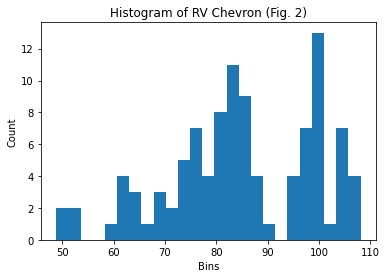

Mean of RV Chevron is 84.70791271844661
Standard deviation of RV Chevron is 14.231432666401195


In [8]:
charvar(chev)

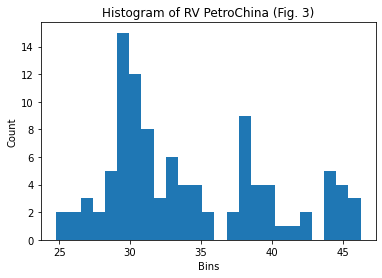

Mean of RV PetroChina is 34.16611650485437
Standard deviation of RV PetroChina is 5.644546338286842


In [9]:
charvar(pc)

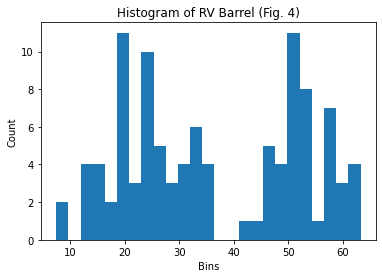

Mean of RV Barrel is 36.64019417475728
Standard deviation of RV Barrel is 15.908580085936196


In [10]:
charvar(barrel)

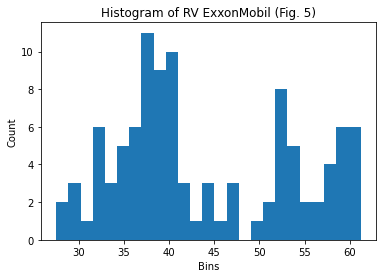

Mean of RV ExxonMobil is 44.0843103592233
Standard deviation of RV ExxonMobil is 9.683727519586174


In [11]:
charvar(xom)

All the RVs are very randomly distributed and donot follow any particular distribution. Barrel and XOM are distributed similarly and their distribution is similar to a double weibull distribution pdf (not exactly similar, but I remember the plot from assignment 3 so based on that it has two twin peaks).

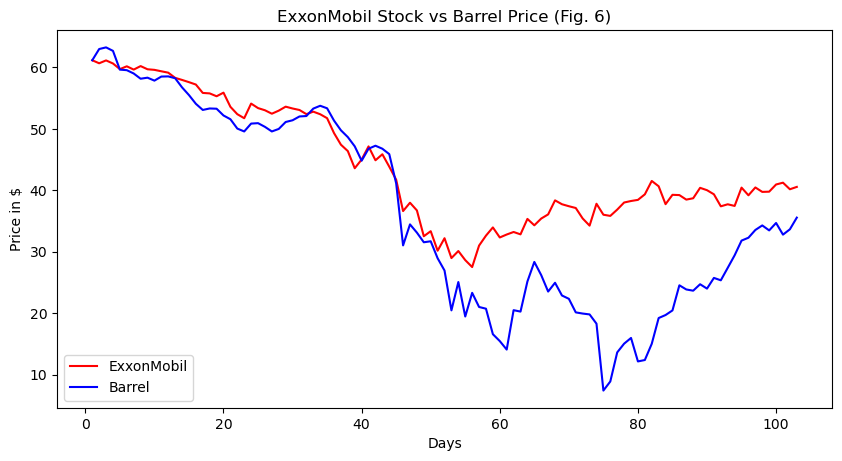

In [12]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,barrel, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "Barrel"],loc="lower left")
plt.title(f"ExxonMobil Stock vs Barrel Price (Fig. {v[0]})")
v[0]+=1
plt.show()

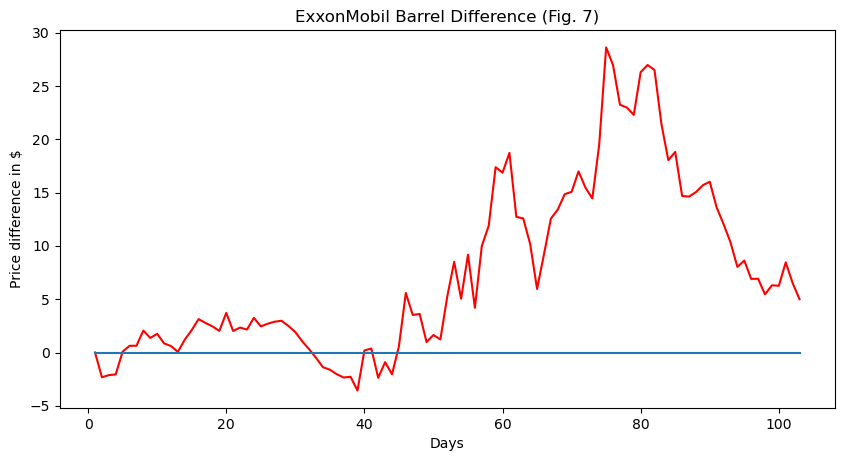

Mean of difference: 7.4441161844660195
Standard deviation of difference: 8.143664383505246
Mean of difference for first 40 days: 0.8006256749999989
Standard deviation of difference for first 40 days: 1.907166916707088


In [13]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom-barrel, 'r')
plt.plot(days,np.zeros_like(days))
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"ExxonMobil Barrel Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(xom-barrel)
s1=np.std(xom-barrel)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")
m2=np.mean(xom[:40]-barrel[:40])
s2=np.std(xom[:40]-barrel[:40])
print(f"Mean of difference for first 40 days: {m2}")
print(f"Standard deviation of difference for first 40 days: {s2}")

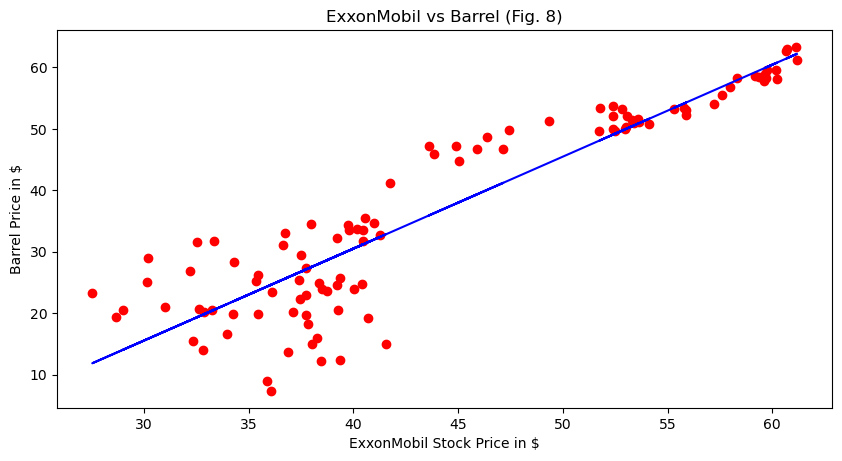

Linear fit is -29.301634351085898+1.4958117295816298*x
Coefficient of Determination= 0.8290412754852055


In [14]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,barrel, 'ro')
(b1,b0)=np.polyfit(xom,barrel,1)
plt.plot(xom,b0+b1*xom,'b-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("Barrel Price in $")
plt.title(f"ExxonMobil vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(xom)):
    SSR+=(b0+b1*xom[i]-np.mean(barrel))**2
    SST+=(barrel[i]-np.mean(barrel))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

The difference between XOM and barrel is small for the first 40 days with the mean difference of first 40 days being 0.8 and standard deviation of the difference being 1.90717. After that the difference increases considerably. From Fig. 8 we can see that the RVs XOM and Barrel are linearly related can be explained by a linear regression mentioned above with coefficient of determination being 0.83. So the regression model isn't good enough (as coefficient of determination <0.9) but still can be taken into consideration as the coefficient of determination is close to 1.

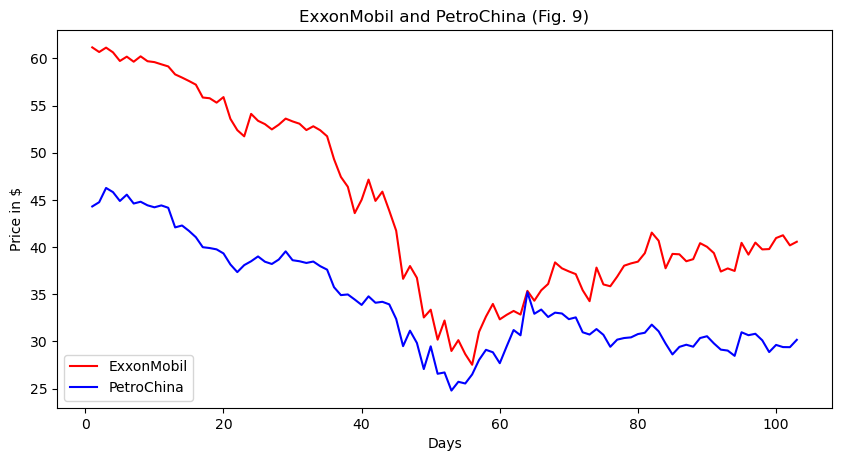

In [15]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,pc, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "PetroChina"],loc="lower left")
plt.title(f"ExxonMobil and PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()

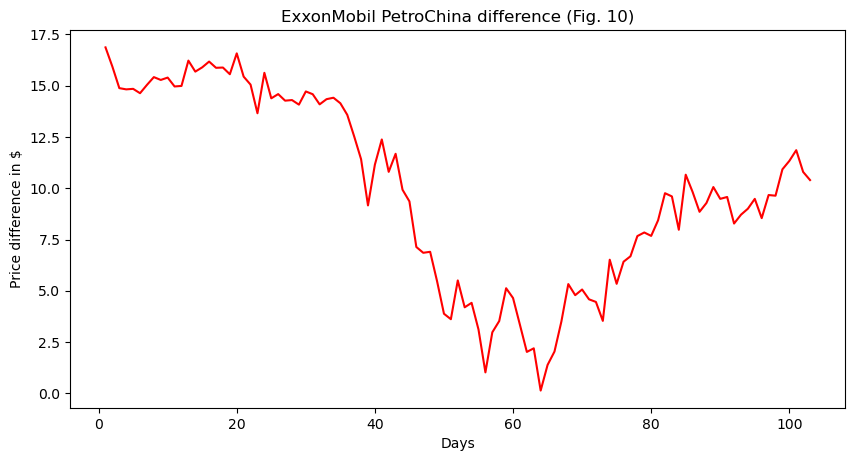

Mean of difference: 9.918193854368932
Standard deviation of difference: 4.5847231792797665
Mean of difference for 40-65 days: 5.265147359999999
Standard deviation of difference for 40-65 days: 3.3004797694021013


In [16]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom-pc, 'r')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"ExxonMobil PetroChina difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(xom-pc)
s1=np.std(xom-pc)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")
m2=np.mean(xom[40:65]-pc[40:65])
s2=np.std(xom[40:65]-pc[40:65])
print(f"Mean of difference for 40-65 days: {m2}")
print(f"Standard deviation of difference for 40-65 days: {s2}")

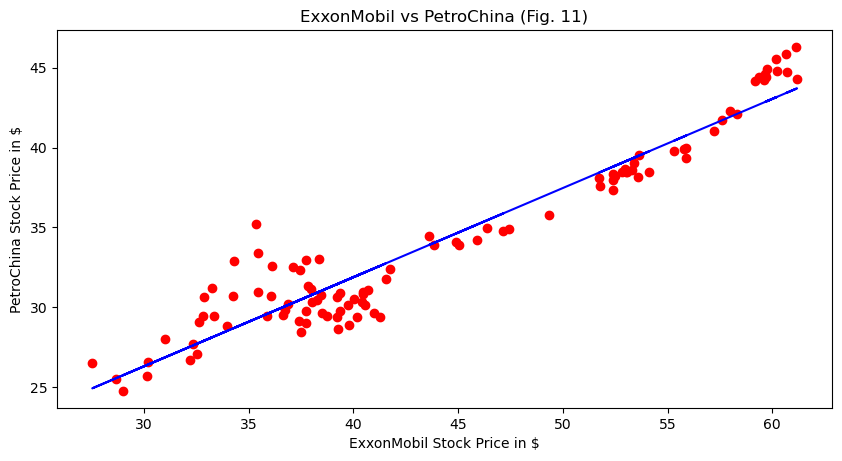

Linear fit is 9.57568241024849+0.5578046677883679*x
Coefficient of Determination= 0.9157803583650855


In [17]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,pc, 'ro')
(b1,b0)=np.polyfit(xom,pc,1)
plt.plot(xom,b0+b1*xom,'b-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("PetroChina Stock Price in $")
plt.title(f"ExxonMobil vs PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(xom)):
    SSR+=(b0+b1*xom[i]-np.mean(pc))**2
    SST+=(pc[i]-np.mean(pc))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

The difference between XOM and PC is small between 40-65 days with the mean difference of this interval being 5.625 and standard deviation of the difference being 3.3.  From Fig.11 we can see that the RVs XOM and PC are linearly related and can be explained by a linear regression mentioned above with coefficient of determination being 0.91578. So the regression model is good enough as the coefficient of determination is close to 1.

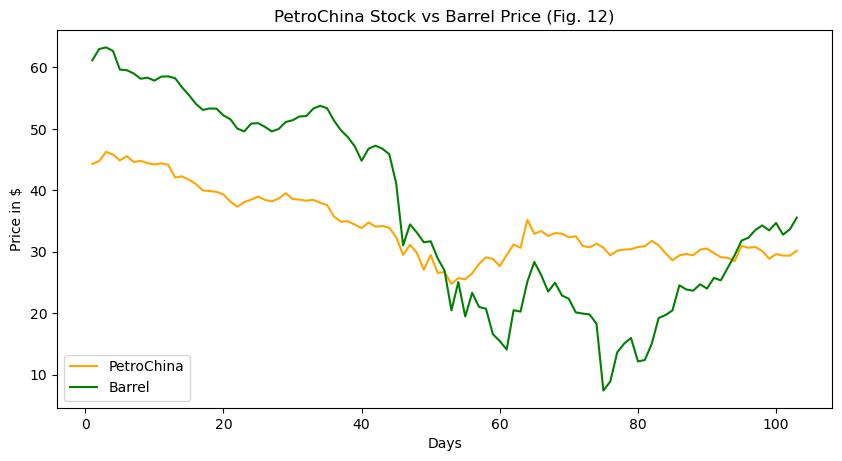

In [18]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc, 'orange')
plt.plot(days,barrel, 'green')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["PetroChina", "Barrel"],loc="lower left")
plt.title(f"PetroChina Stock vs Barrel Price (Fig. {v[0]})")
v[0]+=1
plt.show()

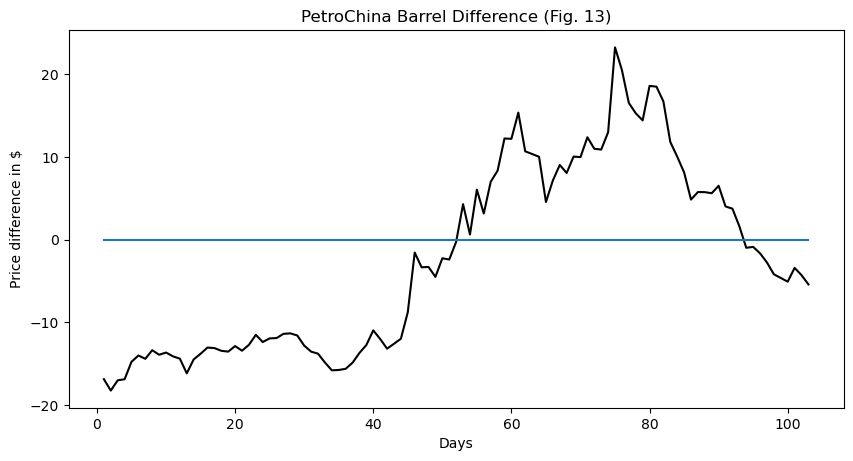

Mean of difference: -2.474077669902913
Standard deviation of difference: 11.335385136295201


In [19]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc-barrel, 'k')
plt.plot(days,np.zeros_like(days))
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"PetroChina Barrel Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(pc-barrel)
s1=np.std(pc-barrel)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

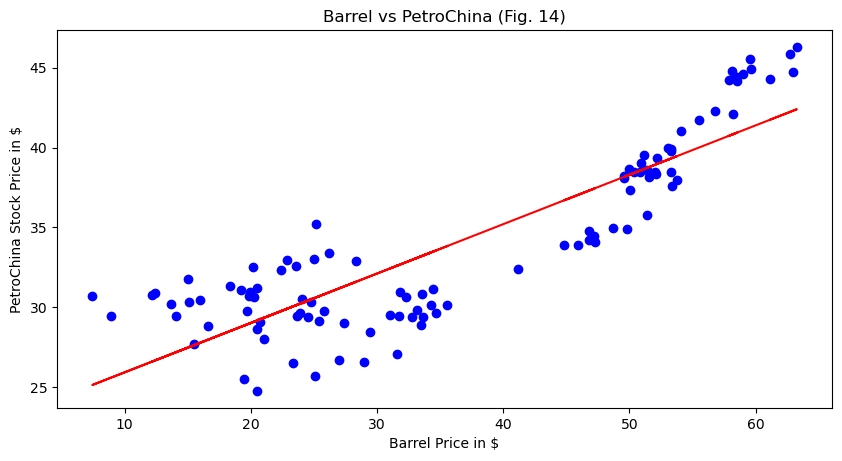

Linear fit is 22.840849202214063+0.30909408527214305*x
Coefficient of Determination= 0.7589027753315246


In [20]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(barrel,pc, 'bo')
(b1,b0)=np.polyfit(barrel,pc,1)
plt.plot(barrel,b0+b1*barrel,'r-')
plt.xlabel("Barrel Price in $")
plt.ylabel("PetroChina Stock Price in $")
plt.title(f"Barrel vs PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(barrel)):
    SSR+=(b0+b1*barrel[i]-np.mean(pc))**2
    SST+=(pc[i]-np.mean(pc))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

The difference between PC and barrel is negative for the first 50 days and then its positive upto 90th day. With the mean difference being -2.474 (which is small) and standard deviation of the difference being 11.3354. The difference starts increasing from 40-80 days and this can be explained by the stock market fall in the March 1st week due to surge in Covid, so price of PetroChina stocks fall and the difference starts increasing.  From Fig.14 we can see that the RVs barrel and PC are linearly related and can be explained by a linear regression mentioned above with coefficient of determination being 0.7589. So the regression model isn't good (coefficient of determination <0.9), but still can be taken into consideration as the coefficient of determination is closer to 1.

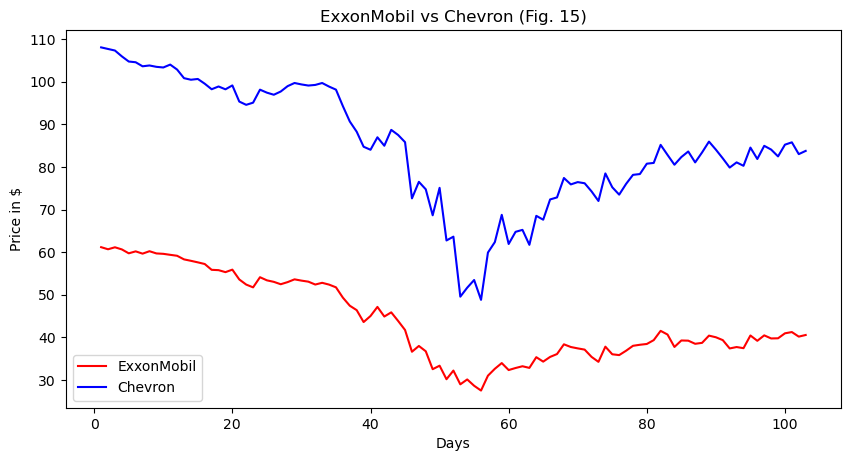

In [21]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,chev, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "Chevron"],loc="lower left")
plt.title(f"ExxonMobil vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()

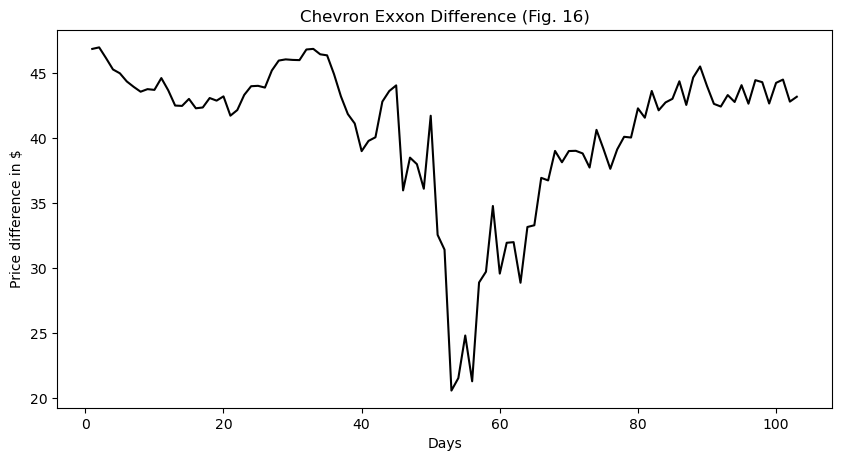

Mean of difference: 40.62360235922329
Standard deviation of difference: 5.684083573348324


In [22]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev-xom, 'k')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Chevron Exxon Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(chev-xom)
s1=np.std(chev-xom)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

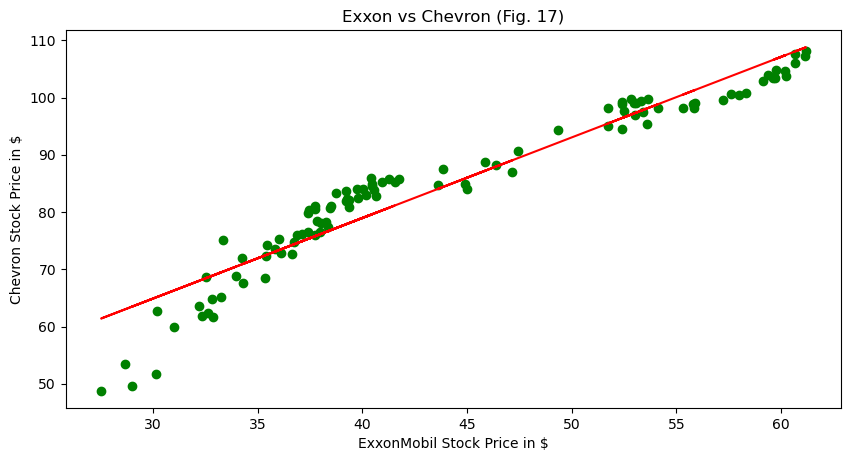

Linear fit is 22.653602371018142+1.40762801644793*x
Coefficient of Determination= 0.9174104465834318


In [23]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,chev, 'go')
(b1,b0)=np.polyfit(xom,chev,1)
plt.plot(xom,b0+b1*xom,'r-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("Chevron Stock Price in $")
plt.title(f"Exxon vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(xom)):
    SSR+=(b0+b1*xom[i]-np.mean(chev))**2
    SST+=(chev[i]-np.mean(chev))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

From Fig.17 we can see that the RVs XOM and Chevron are linearly related and can be explained by a linear regression mentioned above with coefficient of determination being 0.9174. So the regression model is good enough with the coefficient of determination being closer to 1. The difference between the 2 RVs drops down drastically in between 45-55 days and both stocks have almost same value. This can be explained by the collapse of the stock market due to surge in Covid in March 2nd week.

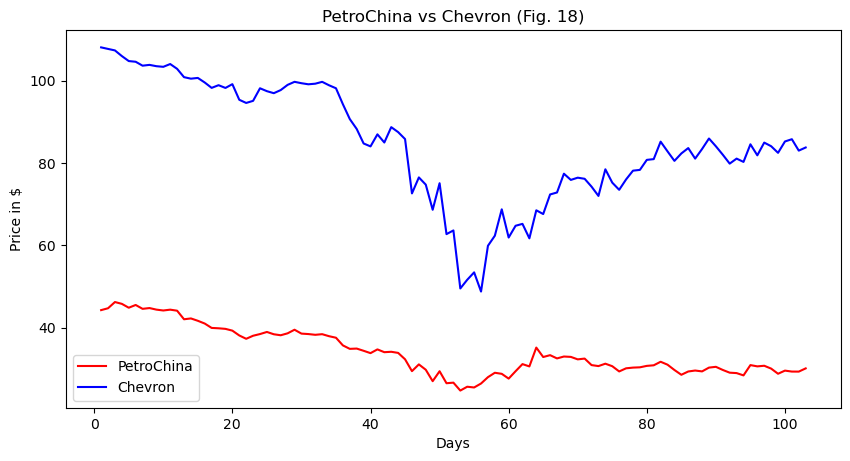

In [24]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc, 'r')
plt.plot(days,chev, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["PetroChina", "Chevron"],loc="lower left")
plt.title(f"PetroChina vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()

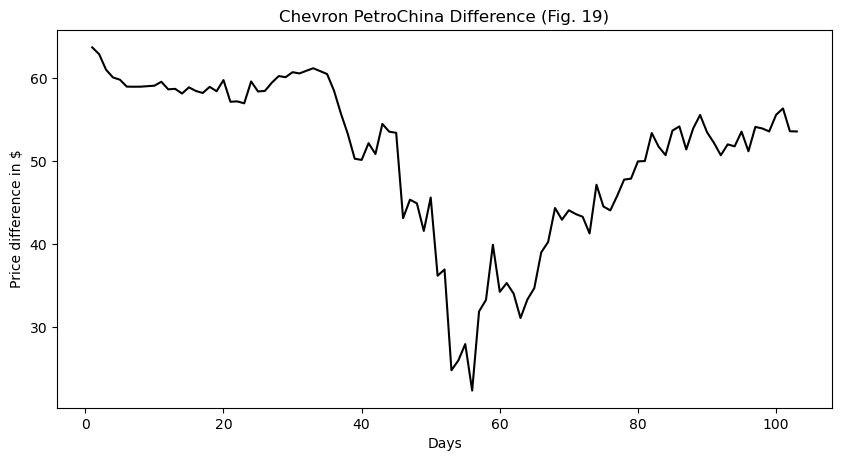

Mean of difference: 50.541796213592235
Standard deviation of difference: 9.64558207772795


In [25]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev-pc, 'k')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Chevron PetroChina Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(chev-pc)
s1=np.std(chev-pc)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

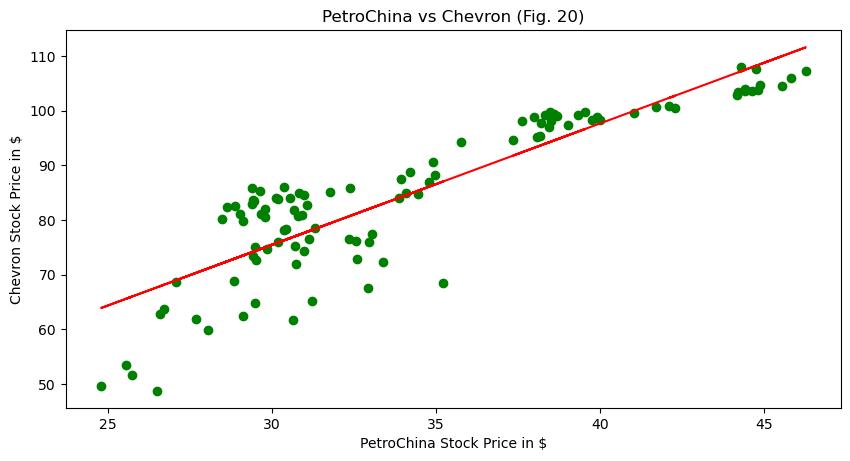

Linear fit is 8.915478398506076+2.2183508713719884*x
Coefficient of Determination= 0.774143225865458


In [26]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(pc,chev, 'go')
(b1,b0)=np.polyfit(pc,chev,1)
plt.plot(pc,b0+b1*pc,'r-')
plt.xlabel("PetroChina Stock Price in $")
plt.ylabel("Chevron Stock Price in $")
plt.title(f"PetroChina vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(pc)):
    SSR+=(b0+b1*pc[i]-np.mean(chev))**2
    SST+=(chev[i]-np.mean(chev))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

From Fig.20 we can see that the RVs XOM and PC are linearly related and can be explained by a linear regression mentioned above with coefficient of determination being 0.774. So the regression model isn't as good enough (coefficient of determination <0.9) but still can be taken into consideration with the coefficient of determination being closer to 1. The difference between the 2 RVs drops down drastically in between 45-55 days and both stocks have almost same value. This can be explained by the collapse of the stock market due to surge in Covid in March 2nd week.

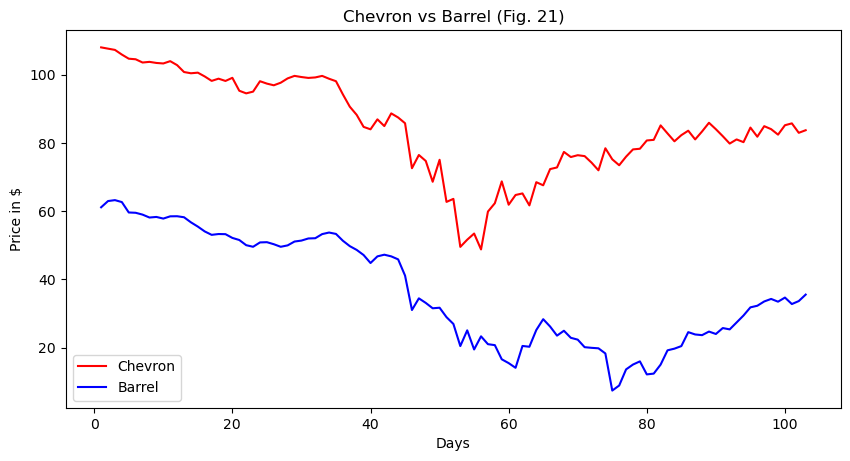

In [27]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev, 'r')
plt.plot(days,barrel, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["Chevron", "Barrel"],loc="lower left")
plt.title(f"Chevron vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()

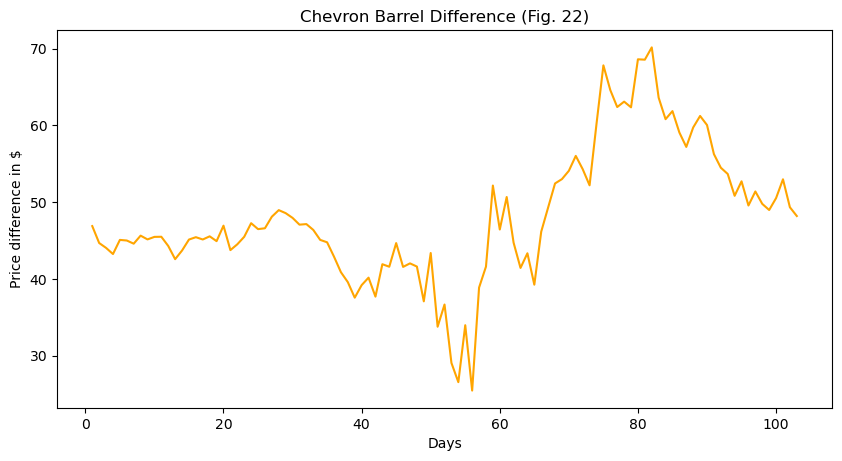

Mean of difference: 48.06771854368934
Standard deviation of difference: 8.679289366614638


In [28]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev-barrel, 'orange')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Chevron Barrel Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(chev-barrel)
s1=np.std(chev-barrel)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

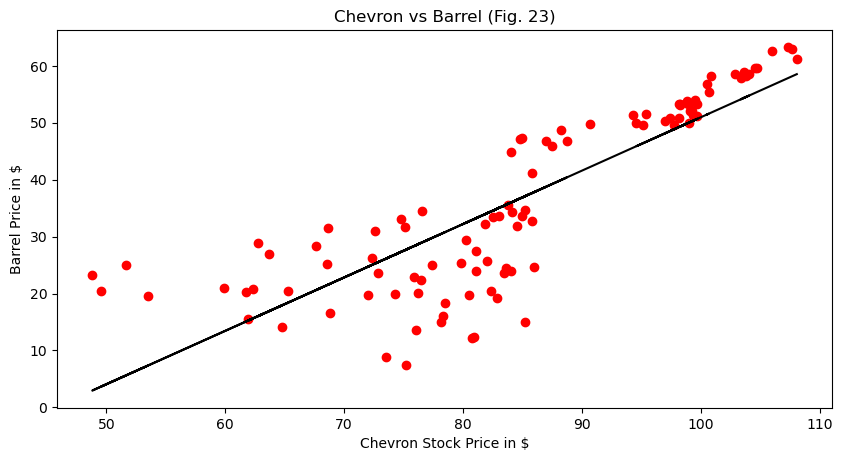

Linear fit is -42.88553965304848+0.9388229655963138*x
Coefficient of Determination= 0.7053453655080093


In [29]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(chev,barrel, 'ro')
(b1,b0)=np.polyfit(chev,barrel,1)
plt.plot(chev,b0+b1*chev,'k-')
plt.xlabel("Chevron Stock Price in $")
plt.ylabel("Barrel Price in $")
plt.title(f"Chevron vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")
SSR=0
SST=0
for i in range(len(pc)):
    SSR+=(b0+b1*chev[i]-np.mean(barrel))**2
    SST+=(barrel[i]-np.mean(barrel))**2
R2=SSR/SST
print(f"Coefficient of Determination= {R2}")

From Fig.23 we can see that the RVs Chevron and Barrel are linearly related and can be explained by a linear regression mentioned above with coefficient of determination being 0.705. So the regression model isn't good (coefficient of determination <0.9) but still can be taken into consideration with the coefficient of determination being closer to 1.

We conclude the following:
<br> The decline in all stocks start around 42nd day which is the first week of March as per our data and that can be explained by the considerable surge in Covid cases all around the world. All the stock prices are linearly dependent on each other to some extent and that is true as world stock market of oil stock is dependent on each other in case of a natural disaster like covid, where all of their prices fall simultaneously. Even when the stocks gain, all of the stocks gain prices together. Evidently, barrel prices are also linearly dependent on stocks. Due to pandemic lockdowns and transport/travel restrictions, the oil supply and transport faced issues which caused the barrel prices to fall as the oil stocks also fell.
<br> We now conclude our pairwise tesing of RVs. 

### $\color{orange}{\text{POINT ESTIMATES AND INTERVAL ESTIMATES}}$

#### CLT and Unbiased estimators

In [30]:
# estimation of population mean and verification of gaussian distribution of scaled and shifted sample parameter
from numpy.random import choice
def xbar_gen(dataset,n_samp):
    avgs = np.array([np.mean(choice(dataset,n_samp,replace=False)) for i in range(10000)])
    return avgs


 

In [31]:
x_bar_xom=xbar_gen(xom,20)
x_bar_chev=xbar_gen(chev,20)
x_bar_pc=xbar_gen(pc,20)
x_bar_barrel=xbar_gen(barrel,20)

In [32]:
xs=np.linspace(30,55,1000)
ys=stats.norm.pdf(xs,np.mean(xom),np.std(xom)/np.sqrt(20))
y=np.linspace(0,0.22,5)
x=[np.mean(xom) for i in y]

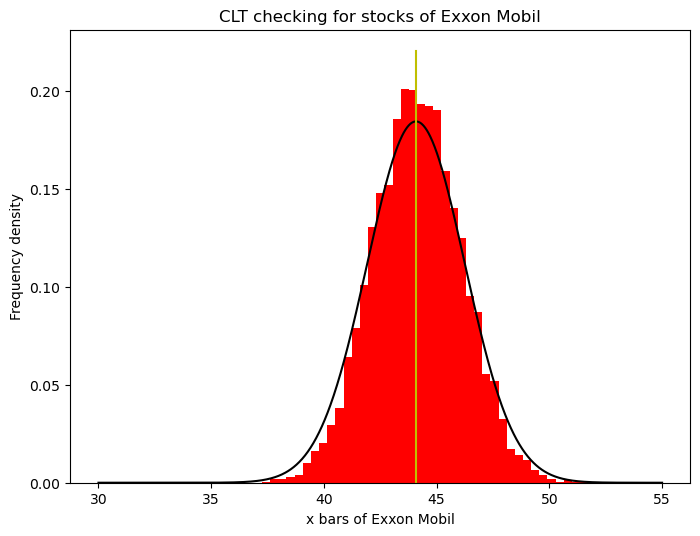

In [33]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_xom,bins=40,density=True,color="red")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'y-',markersize=100)
plt.xlabel("x bars of Exxon Mobil")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Exxon Mobil")
plt.show()

Its evident that the sample parameter ie sample mean follows a gaussian distribution for sample size 20 which is quite large and the expected value of sample mean matches with the mean of the population hence CLT is satisfied

In [34]:
xs=np.linspace(70,100,1000)
ys=stats.norm.pdf(xs,np.mean(chev),np.std(chev)/np.sqrt(20))
y=np.linspace(0,0.14,5)
x=[np.mean(chev) for i in y]

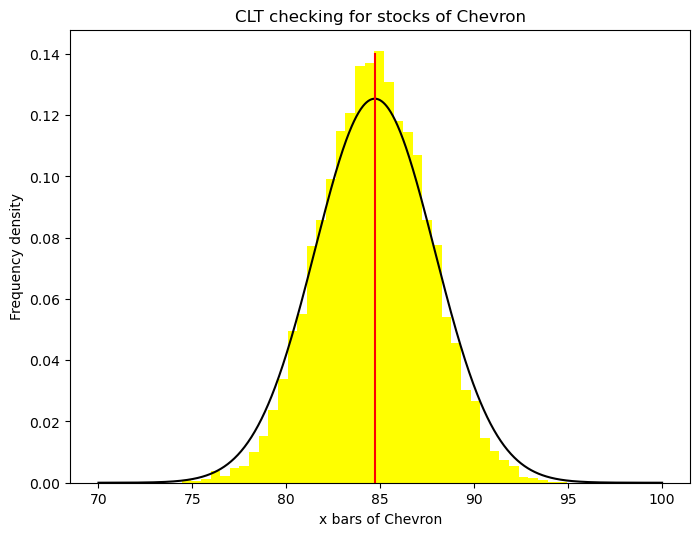

In [35]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_chev,bins=40,density=True,color="yellow")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'r-',markersize=100)
plt.xlabel("x bars of Chevron")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Chevron")
plt.show()

In [36]:
xs=np.linspace(30,40,1000)
ys=stats.norm.pdf(xs,np.mean(pc),np.std(pc)/np.sqrt(20))
y=np.linspace(0,0.35,5)
x=[np.mean(pc) for i in y]

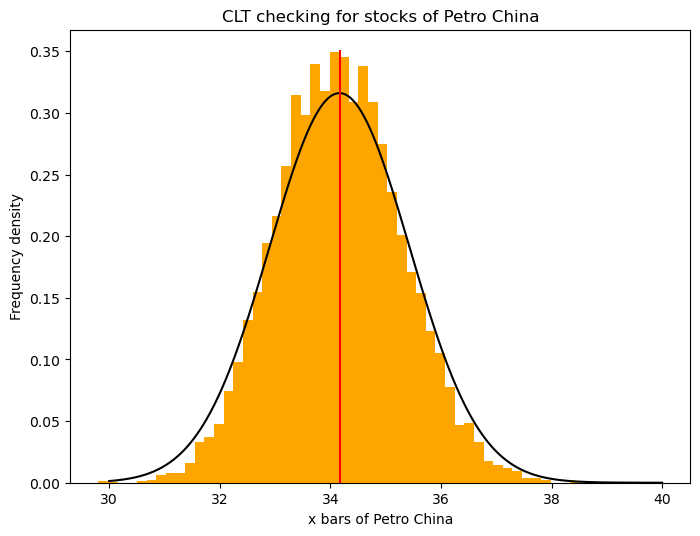

In [37]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_pc,bins=50,density=True,color="orange")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'r-',markersize=100)
plt.xlabel("x bars of Petro China")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Petro China")
plt.show()

In [38]:
xs=np.linspace(23,50,1000)
ys=stats.norm.pdf(xs,np.mean(barrel),np.std(barrel)/np.sqrt(20))
y=np.linspace(0,0.12,5)
x=[np.mean(barrel) for i in y]

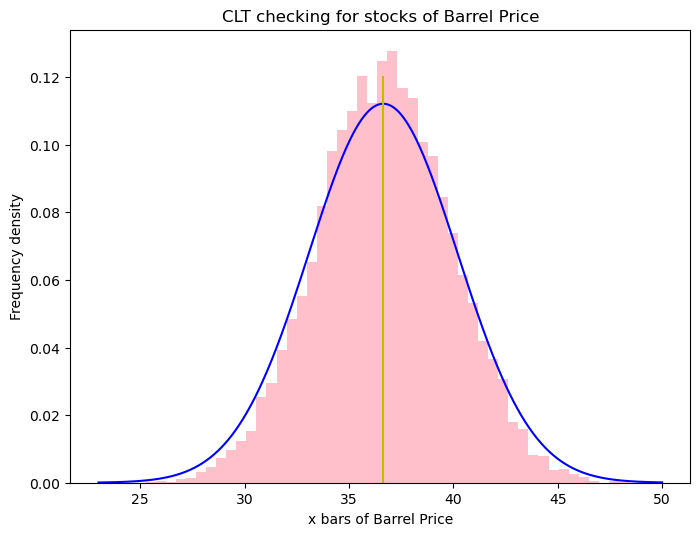

In [39]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_barrel,bins=50,density=True,color="pink")
plt.plot(xs,ys,'b-',markersize=50)
plt.plot(x,y,'y-',markersize=100)
plt.xlabel("x bars of Barrel Price")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Barrel Price")
plt.show()

#### Interval Estimates

we are going to find the 95% confidence intervals in which population mean may lie for a sample from each dataset

In [40]:
Z = stats.norm.ppf(1-0.025) # Z aplha/2 where alpha is 5 %
# this is a useful constant 

In [41]:
# sample generation ie returns mean of a sample
def sample_gen(dataset,n_samp):
    return np.mean(choice(dataset,n_samp,replace=False))
xom_x=sample_gen(xom,20)
chev_x=sample_gen(chev,20)
pc_x=sample_gen(pc,20)
barrel_x=sample_gen(barrel,20)

In [42]:
def error_gen(dataset,n):
    return Z*np.std(dataset)/np.sqrt(n)

In [43]:
# 95% confidence interval PRINTING
#Exxon Mobil CI
print('95% CI for mean stock price of Exxon Mobil is [' ,xom_x - error_gen(xom,20),',',xom_x + error_gen(xom,20),' ]')
print('mean of stocks of Exxon Mobil is', np.mean(xom))
print()
#Chevron CI
print('95% CI for mean stock price of Chevron is [' ,chev_x - error_gen(chev,20),',',chev_x + error_gen(chev,20),' ]')
print('mean of stocks of Chevron is', np.mean(chev))
print()
#Petro China CI 
print('95% CI for mean stock price of Petro China is [' ,pc_x - error_gen(pc,20),',',pc_x + error_gen(pc,20),' ]')
print('mean of stocks of Petro China is', np.mean(pc))
print()
# Barrel CI 
print('95% CI for mean  price of Barrel is [' ,barrel_x - error_gen(barrel,20),',',barrel_x + error_gen(barrel,20),' ]')
print('mean of price of Barrel is', np.mean(barrel))


95% CI for mean stock price of Exxon Mobil is [ 41.35823622614049 , 49.846241673859524  ]
mean of stocks of Exxon Mobil is 44.0843103592233

95% CI for mean stock price of Chevron is [ 71.38716324160073 , 83.86133475839925  ]
mean of stocks of Chevron is 84.70791271844661

95% CI for mean stock price of Petro China is [ 31.810213951581293 , 36.757786048418716  ]
mean of stocks of Petro China is 34.16611650485437

95% CI for mean  price of Barrel is [ 25.01638548305459 , 38.9606145169454  ]
mean of price of Barrel is 36.64019417475728


The means lie in the corresponding interval because 95% is a very high probability

## $\color{blue}{\text{Hypothesis Testing}}$

We must put forward a hypothesis that must be tested:<BR>
The relation btw means of barrel and stock prices of various companies
    

In [44]:
print('mean of stocks of Exxon Mobil is', np.mean(xom))
print('mean of stocks of Chevron is', np.mean(chev))
print('mean of stocks of Petro China is', np.mean(pc))
print('mean of price of Barrel is', np.mean(barrel))

mean of stocks of Exxon Mobil is 44.0843103592233
mean of stocks of Chevron is 84.70791271844661
mean of stocks of Petro China is 34.16611650485437
mean of price of Barrel is 36.64019417475728


Exxon Mobil and Chevron has sample mean ( of available sample ) greater than that of Barrel price meanwhile Petro China has lower mean than Barrel
. However this data is only over 103 days but we need to have an idea about the relation between their lifetime ( global ) means ie mean over infinite ( practically ) . So we apply Hypothesis testing for the available sample.

#### $\color{lime}{\text{Exxon Mobil vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Exxon Mobil} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Exxon Mobil} > \mu_{Barrel}$ <br>
We have $\bar{x}$ values for a sample of 103 data points for both Exxon Mobil and Barrel and lets assume that their original standard deviations are unknown and unequal. Hence our test variable is $$T= \frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sqrt{{S_1}^{2}  +  {S_2}^{2} }} \sqrt{N}$$ where N is 103 and we are going to apply this model for all the following hypothesis tests. For this case 1 represents exxon mobil and p value is the probability that t > T and usually T follows a t distribution with degree of freedom given by the formula $$ (N-1)\frac{(S_1^2 + S_2 ^2)^2}{S_1^4 + S_2^4}$$  and level of significance is 0.05


In [45]:
# Computation of T
T = ( np.mean(xom) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(xom,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(xom,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(xom,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

4.0368041951006415 T value
degree 168


4.109478601921346e-05

here p- value  is way less than the level of significance hence we reject the null hypothesis and we can conclude that the global mean of Exxon Mobile stocks may be greater than that of barrel prices

#### $\color{lime}{\text{Chevron vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Chevron} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Chevron} > \mu_{Barrel}$ <br>

In [46]:
# Computation of T
T = ( np.mean(chev) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(chev,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(chev,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(chev,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

22.743318214465212 T value
degree 201


0.0

Here again the p value is very small and off the limits of computer hence we reject the null hypothesis and can proceed to establish the alternate hypthesis which matches with the sample data

#### $\color{lime}{\text{Petro China vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Petro China} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Petro China} < \mu_{Barrel}$ <br>

In [47]:
# Computation of T
T = -( np.mean(pc) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(pc,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(pc,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(pc,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

1.480245643065508 T value
degree 127


0.07064209986864578

Here the p_value is 0.07 which is higher than level of significance 0.05 hence we fail to reject the null hypothesis based on the available data

### We now conclude the project. All the findings and conclusions obtained from the project have been mentioned in the comments and markdown sections. 

### Contributions:
#### Shantanu Welling (210010076): 
<br> 1) EDA (Exploratory Data Analysis)
<br> 2) Characterization of variables
<br> 3) Pairwise testing of RVs
<br> 4) WTI Crude oil barrel price data and ExxonMobil stock data 
<br> (Code lines 1-29 in this file)
<br>
#### Vighnesh JR (210010073):
<br> 1) Hypothesis Testing
<br> 2) Point and Interval estimates
<br> 3) CLT and unbiased estimators
<br> 4) Chevron stock data 
<br> (Code lines 30-47 in this file)
<br>
#### Sahil Kale (210010054):
<br> 1) PetroChina Stock data

### Sources:
Oil Barrel Prices: https://www.eia.gov/dnav/pet/hist/RWTCD.htm
<br> ExxonMobil Stock Prices: https://finance.yahoo.com/quote/XOM/history?period1=1577836800&period2=1590883200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
<br> Chevron Stock Prices: https://finance.yahoo.com/quote/cvx/history?ltr=1
<br> PetroChina Stock Prices: https://finance.yahoo.com/quote/PTR/history/ 

A further note:
The stock data available on the sites mentioned above, has data missing for few dates, so we took only the data which had common dates for all RVs and deleted the data for all RVs even if the data for 1 RV was missing for that corresponding date. Which is why the index goes till 102 (equivalent to 102 days) even though the time period is from Jan 2020 to May 2020 (equivalent to 150 days).